# ANALISIS DE INCLUSIÓN EDUCATIVA EN COLOMBIA:BRECHAS EN ZONAS RURALES EN NIVEL SUPERIOR

IMPORTAR LIBRERIAS Y CARGAR EL DATASET

In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [161]:
data=pd.read_csv("/content/ESTABLECIMIENTOS_EDUCATIVOS-COLOMBIA_20250608.csv")

INFORMACIÓN DEL CONTENIDO DE LA DATA

In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22530 entries, 0 to 22529
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   año                        22530 non-null  int64  
 1   secretaria                 22530 non-null  object 
 2   codigodepartamento         22530 non-null  int64  
 3   nombredepartamento         22530 non-null  object 
 4   codigomunicipio            22530 non-null  int64  
 5   nombremunicipio            22530 non-null  object 
 6   codigoestablecimiento      22530 non-null  int64  
 7   nombreestablecimiento      22530 non-null  object 
 8   zona                       22528 non-null  object 
 9   direccion                  22530 non-null  object 
 10  telefono                   20298 non-null  object 
 11  nombre_Rector              22510 non-null  object 
 12  tipo_Establecimiento       22530 non-null  object 
 13  etnias                     914 non-null    obj

In [163]:
data.head()

,año,secretaria,codigodepartamento,nombredepartamento,codigomunicipio,nombremunicipio,codigoestablecimiento,nombreestablecimiento,zona,direccion,...,numero_de_Sedes,estado,prestador_de_Servicio,propiedad_Planta_Fisica,resguardo,matricula_Contratada,calendario,internado,estrato_Socio_Economico,correo_Electronico
0,2016,BUCARAMANGA,68,SANTANDER,68001,BUCARAMANGA,368001000290,FUND COL NUEVA GENERACION JUVENIL ...,URBANA,CLL 8 NO 22-57,...,1,NaN,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,NO,A,NaN,NaN,...
1,2016,BUCARAMANGA,68,SANTANDER,68001,BUCARAMANGA,368001006298,COL MUNDO CONSTRUCTIVO ...,URBANA,CLL 84 NO 24ª - 60,...,1,NaN,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,NO,A,NaN,NaN,...
2,2016,BUCARAMANGA,68,SANTANDER,68001,BUCARAMANGA,368001000907,COL ATENAS ...,URBANA,CR 26 NO 33-73,...,1,NaN,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,NO,A,NaN,NaN,...
3,2016,SANTANDER,68,SANTANDER,68077,BARBOSA,368077000264,COLEGIO EVANGÉLICO INTERAMERICANO ...,URBANA,CARRERA 10 # 9 - 12,...,1,NaN,COMUNIDAD RELIGIOSA,COMUNIDAD RELIGIOSA,NO APLICA,NO,A,NaN,NaN,...
4,2016,NORTE SANTANDER,54,NORTE DE SANTANDER,54874,VILLA DEL ROSARIO,354874000619,COL NUESTRA SEÑORA DEL ROSARIO,URBANA,CLL 6 8-48 B.GRAMALOTE,...,1,NaN,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,NO,A,NaN,NaN,-


ELECCIÓN DE COLUMNAS A UTILIZAR

In [164]:
dt=data[["nombredepartamento","nombremunicipio","nombreestablecimiento","zona","tipo_Establecimiento","etnias","niveles","jornadas","especialidad","grados","modelos_Educativos","capacidades_Excepcionales","discapacidades","prestador_de_Servicio","resguardo","calendario"]]

Renombramos las columnas

In [165]:
dt.columns=["DEPARTAMENTO","MUNICIPIO","ESTABLECIMIENTO_EDUCATIVO","ZONA","TIPO_ESTABLECIMIENTO","ETNIAS","NIVELES","JORNADAS","ESPECIALIDAD","GRADOS","MODELOS_EDUCATIVOS","CAPACIDADES_EXCEPCIONALES","DISCAPACIDADES","PRESTADOR_DE_SERVICIO","RESGUARDO","CALENDARIO"]

In [166]:
dt

,DEPARTAMENTO,MUNICIPIO,ESTABLECIMIENTO_EDUCATIVO,ZONA,TIPO_ESTABLECIMIENTO,ETNIAS,NIVELES,JORNADAS,ESPECIALIDAD,GRADOS,MODELOS_EDUCATIVOS,CAPACIDADES_EXCEPCIONALES,DISCAPACIDADES,PRESTADOR_DE_SERVICIO,RESGUARDO,CALENDARIO
0,SANTANDER,BUCARAMANGA,FUND COL NUEVA GENERACION JUVENIL ...,URBANA,INSTITUCION EDUCATIVA,NaN,"MEDIA,BÁSICA SECUNDARIA","MAÑANA,NOCTURNA",ACADÉMICA,"6,7,8,9,10,11",EDUCACIÓN TRADICIONAL,NaN,NaN,PERSONA NATURAL,NO APLICA,A
1,SANTANDER,BUCARAMANGA,COL MUNDO CONSTRUCTIVO ...,URBANA,CENTRO EDUCATIVO,NaN,PREESCOLAR,TARDE,NaN,-3,EDUCACIÓN TRADICIONAL,NaN,NaN,PERSONA NATURAL,NO APLICA,A
2,SANTANDER,BUCARAMANGA,COL ATENAS ...,URBANA,INSTITUCION EDUCATIVA,NaN,MEDIA,FIN DE SEMANA,ACADÉMICA,"10,11",EDUCACIÓN TRADICIONAL,NaN,NaN,PERSONA NATURAL,NO APLICA,A
3,SANTANDER,BARBOSA,COLEGIO EVANGÉLICO INTERAMERICANO ...,URBANA,CENTRO EDUCATIVO,NaN,"PREESCOLAR,BÁSICA SECUNDARIA,BÁSICA PRIMARIA",COMPLETA,NaN,"-2,-1,0,1,2,3,4,5,6,7",EDUCACIÓN TRADICIONAL,NaN,"DI-COGNITIVO,SÍNDROME DE DOWN",COMUNIDAD RELIGIOSA,NO APLICA,A
4,NORTE DE SANTANDER,VILLA DEL ROSARIO,COL NUESTRA SEÑORA DEL ROSARIO,URBANA,INSTITUCION EDUCATIVA,NaN,"PREESCOLAR,MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIM...",MAÑANA,ACADÉMICA,"-2,-1,0,1,2,3,4,5,6,7,8,9,10,11",EDUCACIÓN TRADICIONAL,NaN,NaN,PERSONA NATURAL,NO APLICA,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22525,MAGDALENA,SITIONUEVO,CENTRIO DE FORMACION INFANTIL RAYITO DE LUZ,URBANA,CENTRO EDUCATIVO,NaN,"PREESCOLAR,BÁSICA PRIMARIA",MAÑANA,NaN,"-2,-1,0,1,2,3,4,5",EDUCACIÓN TRADICIONAL,NaN,NaN,PERSONA NATURAL,NO APLICA,A
22526,BOLÍVAR,CARTAGENA,COL. LA ANUNCIACION,URBANA,INSTITUCION EDUCATIVA,NaN,"PREESCOLAR,MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIM...",COMPLETA,ACADÉMICA,"-2,-1,0,1,2,3,4,5,6,7,8,9,10,11",EDUCACIÓN TRADICIONAL,NaN,NaN,COMUNIDAD RELIGIOSA,NO APLICA,A
22527,VALLE DEL CAUCA,BUENAVENTURA,CENTRO EDUCATIVO EUSEBIO ANGULO,URBANA,INSTITUCION EDUCATIVA,NaN,"PREESCOLAR,MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIM...","MAÑANA,NOCTURNA,TARDE",ACADÉMICA,"0,1,2,3,4,5,6,7,8,9,10,11,21,22,23,24,25","PROGRAMA PARA JÓVENES EN EXTRAEDAD Y ADULTOS,E...",NaN,NaN,PERSONA NATURAL,NO APLICA,A
22528,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",LIC APRENDO CON MIS AMIGOS ...,URBANA,CENTRO EDUCATIVO,NaN,"PREESCOLAR,BÁSICA PRIMARIA",COMPLETA,NaN,"-2,-1,0,1,2,3,4,5","PREESCOLAR ESCOLARIZADO_,EDUCACIÓN TRADICIONAL",NaN,NaN,PERSONA NATURAL,NO APLICA,A


OBSERVACIÓN E IDENTIFICACIÓN DE DATOS NULOS

In [167]:
dt.isnull().sum()

,0
DEPARTAMENTO,0
MUNICIPIO,0
ESTABLECIMIENTO_EDUCATIVO,0
ZONA,2
TIPO_ESTABLECIMIENTO,0
ETNIAS,21616
NIVELES,217
JORNADAS,190
ESPECIALIDAD,10676
GRADOS,217


SE RELLENAN LOS VALORES NULOS CON "NO APLICA"

In [168]:
Est_edu_col=dt.fillna("NO APLICA")

In [169]:
Est_edu_col

,DEPARTAMENTO,MUNICIPIO,ESTABLECIMIENTO_EDUCATIVO,ZONA,TIPO_ESTABLECIMIENTO,ETNIAS,NIVELES,JORNADAS,ESPECIALIDAD,GRADOS,MODELOS_EDUCATIVOS,CAPACIDADES_EXCEPCIONALES,DISCAPACIDADES,PRESTADOR_DE_SERVICIO,RESGUARDO,CALENDARIO
0,SANTANDER,BUCARAMANGA,FUND COL NUEVA GENERACION JUVENIL ...,URBANA,INSTITUCION EDUCATIVA,NO APLICA,"MEDIA,BÁSICA SECUNDARIA","MAÑANA,NOCTURNA",ACADÉMICA,"6,7,8,9,10,11",EDUCACIÓN TRADICIONAL,NO APLICA,NO APLICA,PERSONA NATURAL,NO APLICA,A
1,SANTANDER,BUCARAMANGA,COL MUNDO CONSTRUCTIVO ...,URBANA,CENTRO EDUCATIVO,NO APLICA,PREESCOLAR,TARDE,NO APLICA,-3,EDUCACIÓN TRADICIONAL,NO APLICA,NO APLICA,PERSONA NATURAL,NO APLICA,A
2,SANTANDER,BUCARAMANGA,COL ATENAS ...,URBANA,INSTITUCION EDUCATIVA,NO APLICA,MEDIA,FIN DE SEMANA,ACADÉMICA,"10,11",EDUCACIÓN TRADICIONAL,NO APLICA,NO APLICA,PERSONA NATURAL,NO APLICA,A
3,SANTANDER,BARBOSA,COLEGIO EVANGÉLICO INTERAMERICANO ...,URBANA,CENTRO EDUCATIVO,NO APLICA,"PREESCOLAR,BÁSICA SECUNDARIA,BÁSICA PRIMARIA",COMPLETA,NO APLICA,"-2,-1,0,1,2,3,4,5,6,7",EDUCACIÓN TRADICIONAL,NO APLICA,"DI-COGNITIVO,SÍNDROME DE DOWN",COMUNIDAD RELIGIOSA,NO APLICA,A
4,NORTE DE SANTANDER,VILLA DEL ROSARIO,COL NUESTRA SEÑORA DEL ROSARIO,URBANA,INSTITUCION EDUCATIVA,NO APLICA,"PREESCOLAR,MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIM...",MAÑANA,ACADÉMICA,"-2,-1,0,1,2,3,4,5,6,7,8,9,10,11",EDUCACIÓN TRADICIONAL,NO APLICA,NO APLICA,PERSONA NATURAL,NO APLICA,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22525,MAGDALENA,SITIONUEVO,CENTRIO DE FORMACION INFANTIL RAYITO DE LUZ,URBANA,CENTRO EDUCATIVO,NO APLICA,"PREESCOLAR,BÁSICA PRIMARIA",MAÑANA,NO APLICA,"-2,-1,0,1,2,3,4,5",EDUCACIÓN TRADICIONAL,NO APLICA,NO APLICA,PERSONA NATURAL,NO APLICA,A
22526,BOLÍVAR,CARTAGENA,COL. LA ANUNCIACION,URBANA,INSTITUCION EDUCATIVA,NO APLICA,"PREESCOLAR,MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIM...",COMPLETA,ACADÉMICA,"-2,-1,0,1,2,3,4,5,6,7,8,9,10,11",EDUCACIÓN TRADICIONAL,NO APLICA,NO APLICA,COMUNIDAD RELIGIOSA,NO APLICA,A
22527,VALLE DEL CAUCA,BUENAVENTURA,CENTRO EDUCATIVO EUSEBIO ANGULO,URBANA,INSTITUCION EDUCATIVA,NO APLICA,"PREESCOLAR,MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIM...","MAÑANA,NOCTURNA,TARDE",ACADÉMICA,"0,1,2,3,4,5,6,7,8,9,10,11,21,22,23,24,25","PROGRAMA PARA JÓVENES EN EXTRAEDAD Y ADULTOS,E...",NO APLICA,NO APLICA,PERSONA NATURAL,NO APLICA,A
22528,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",LIC APRENDO CON MIS AMIGOS ...,URBANA,CENTRO EDUCATIVO,NO APLICA,"PREESCOLAR,BÁSICA PRIMARIA",COMPLETA,NO APLICA,"-2,-1,0,1,2,3,4,5","PREESCOLAR ESCOLARIZADO_,EDUCACIÓN TRADICIONAL",NO APLICA,NO APLICA,PERSONA NATURAL,NO APLICA,A


CREACION DE COLUMNA DE DIVERSIDAD E INCLUSION CON PUNTUACION DEL 0 AL 3

In [170]:
def calcular_puntuacion_simple(row):
    puntuacion = 0
    if row['ETNIAS'] != 'NO APLICA':
        puntuacion += 1
    if row['DISCAPACIDADES'] != 'NO APLICA':
        puntuacion += 1
    if row['CAPACIDADES_EXCEPCIONALES'] != 'NO APLICA':
        puntuacion += 1
    return puntuacion

# Aplicar la función para crear la nueva columna
Est_edu_col['DIVERSIDAD_E_INCLUSION'] = Est_edu_col.apply(calcular_puntuacion_simple, axis=1)

# Mostrar las primeras filas con la nueva columna
print(Est_edu_col[['ETNIAS', 'DISCAPACIDADES', 'CAPACIDADES_EXCEPCIONALES', 'DIVERSIDAD_E_INCLUSION']].head())

      ETNIAS                 DISCAPACIDADES CAPACIDADES_EXCEPCIONALES  \
0  NO APLICA                      NO APLICA                 NO APLICA   
1  NO APLICA                      NO APLICA                 NO APLICA   
2  NO APLICA                      NO APLICA                 NO APLICA   
3  NO APLICA  DI-COGNITIVO,SÍNDROME DE DOWN                 NO APLICA   
4  NO APLICA                      NO APLICA                 NO APLICA   

   DIVERSIDAD_E_INCLUSION  
0                       0  
1                       0  
2                       0  
3                       1  
4                       0  


In [171]:
Est_edu_col["DIVERSIDAD_E_INCLUSION"].value_counts()

,count
DIVERSIDAD_E_INCLUSION,
0,18745
1,3427
2,340
3,18


CREACION DE COLUMNA DE DIVERSIDAD E INCLUSION BINARIA

In [172]:
# Crear la columna DIVERSIDAD_E_INCLUSION_BINARIA con 1 si tiene etnia, discapacidad o capacidad excepcional, 0 de lo contrario
Est_edu_col['DIVERSIDAD_E_INCLUSION_BINARIA'] = ((Est_edu_col['ETNIAS'] != 'NO APLICA') |
                                                (Est_edu_col['DISCAPACIDADES'] != 'NO APLICA') |
                                                (Est_edu_col['CAPACIDADES_EXCEPCIONALES'] != 'NO APLICA')).astype(int)

# Mostrar las primeras filas con la nueva columna para verificar
print(Est_edu_col[['ETNIAS', 'DISCAPACIDADES', 'CAPACIDADES_EXCEPCIONALES', 'DIVERSIDAD_E_INCLUSION_BINARIA']].head())

      ETNIAS                 DISCAPACIDADES CAPACIDADES_EXCEPCIONALES  \
0  NO APLICA                      NO APLICA                 NO APLICA   
1  NO APLICA                      NO APLICA                 NO APLICA   
2  NO APLICA                      NO APLICA                 NO APLICA   
3  NO APLICA  DI-COGNITIVO,SÍNDROME DE DOWN                 NO APLICA   
4  NO APLICA                      NO APLICA                 NO APLICA   

   DIVERSIDAD_E_INCLUSION_BINARIA  
0                               0  
1                               0  
2                               0  
3                               1  
4                               0  


In [173]:
Est_edu_col["DIVERSIDAD_E_INCLUSION_BINARIA"].value_counts()

,count
DIVERSIDAD_E_INCLUSION_BINARIA,
0,18745
1,3785


CREACION DE LA COLUMNA PARA LOS ESTABLECIMIENTOS QUE TIENEN NIVEL SUPERIOR

In [174]:
Est_edu_col['NIVEL_SUPERIOR'] = Est_edu_col['NIVELES'].str.contains('SECUNDARIA|MEDIA', case=False, na=False).astype(int)

In [175]:
Est_edu_col

,DEPARTAMENTO,MUNICIPIO,ESTABLECIMIENTO_EDUCATIVO,ZONA,TIPO_ESTABLECIMIENTO,ETNIAS,NIVELES,JORNADAS,ESPECIALIDAD,GRADOS,MODELOS_EDUCATIVOS,CAPACIDADES_EXCEPCIONALES,DISCAPACIDADES,PRESTADOR_DE_SERVICIO,RESGUARDO,CALENDARIO,DIVERSIDAD_E_INCLUSION,DIVERSIDAD_E_INCLUSION_BINARIA,NIVEL_SUPERIOR
0,SANTANDER,BUCARAMANGA,FUND COL NUEVA GENERACION JUVENIL ...,URBANA,INSTITUCION EDUCATIVA,NO APLICA,"MEDIA,BÁSICA SECUNDARIA","MAÑANA,NOCTURNA",ACADÉMICA,"6,7,8,9,10,11",EDUCACIÓN TRADICIONAL,NO APLICA,NO APLICA,PERSONA NATURAL,NO APLICA,A,0,0,1
1,SANTANDER,BUCARAMANGA,COL MUNDO CONSTRUCTIVO ...,URBANA,CENTRO EDUCATIVO,NO APLICA,PREESCOLAR,TARDE,NO APLICA,-3,EDUCACIÓN TRADICIONAL,NO APLICA,NO APLICA,PERSONA NATURAL,NO APLICA,A,0,0,0
2,SANTANDER,BUCARAMANGA,COL ATENAS ...,URBANA,INSTITUCION EDUCATIVA,NO APLICA,MEDIA,FIN DE SEMANA,ACADÉMICA,"10,11",EDUCACIÓN TRADICIONAL,NO APLICA,NO APLICA,PERSONA NATURAL,NO APLICA,A,0,0,1
3,SANTANDER,BARBOSA,COLEGIO EVANGÉLICO INTERAMERICANO ...,URBANA,CENTRO EDUCATIVO,NO APLICA,"PREESCOLAR,BÁSICA SECUNDARIA,BÁSICA PRIMARIA",COMPLETA,NO APLICA,"-2,-1,0,1,2,3,4,5,6,7",EDUCACIÓN TRADICIONAL,NO APLICA,"DI-COGNITIVO,SÍNDROME DE DOWN",COMUNIDAD RELIGIOSA,NO APLICA,A,1,1,1
4,NORTE DE SANTANDER,VILLA DEL ROSARIO,COL NUESTRA SEÑORA DEL ROSARIO,URBANA,INSTITUCION EDUCATIVA,NO APLICA,"PREESCOLAR,MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIM...",MAÑANA,ACADÉMICA,"-2,-1,0,1,2,3,4,5,6,7,8,9,10,11",EDUCACIÓN TRADICIONAL,NO APLICA,NO APLICA,PERSONA NATURAL,NO APLICA,A,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22525,MAGDALENA,SITIONUEVO,CENTRIO DE FORMACION INFANTIL RAYITO DE LUZ,URBANA,CENTRO EDUCATIVO,NO APLICA,"PREESCOLAR,BÁSICA PRIMARIA",MAÑANA,NO APLICA,"-2,-1,0,1,2,3,4,5",EDUCACIÓN TRADICIONAL,NO APLICA,NO APLICA,PERSONA NATURAL,NO APLICA,A,0,0,0
22526,BOLÍVAR,CARTAGENA,COL. LA ANUNCIACION,URBANA,INSTITUCION EDUCATIVA,NO APLICA,"PREESCOLAR,MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIM...",COMPLETA,ACADÉMICA,"-2,-1,0,1,2,3,4,5,6,7,8,9,10,11",EDUCACIÓN TRADICIONAL,NO APLICA,NO APLICA,COMUNIDAD RELIGIOSA,NO APLICA,A,0,0,1
22527,VALLE DEL CAUCA,BUENAVENTURA,CENTRO EDUCATIVO EUSEBIO ANGULO,URBANA,INSTITUCION EDUCATIVA,NO APLICA,"PREESCOLAR,MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIM...","MAÑANA,NOCTURNA,TARDE",ACADÉMICA,"0,1,2,3,4,5,6,7,8,9,10,11,21,22,23,24,25","PROGRAMA PARA JÓVENES EN EXTRAEDAD Y ADULTOS,E...",NO APLICA,NO APLICA,PERSONA NATURAL,NO APLICA,A,0,0,1
22528,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",LIC APRENDO CON MIS AMIGOS ...,URBANA,CENTRO EDUCATIVO,NO APLICA,"PREESCOLAR,BÁSICA PRIMARIA",COMPLETA,NO APLICA,"-2,-1,0,1,2,3,4,5","PREESCOLAR ESCOLARIZADO_,EDUCACIÓN TRADICIONAL",NO APLICA,NO APLICA,PERSONA NATURAL,NO APLICA,A,0,0,0


CREACION DE COLUMNA ZONA CLASIFICADA PARA NORMALIZAR LA COLUMNA ZONA

In [176]:
# Función para clasificar la zona
def clasificar_zona(zona):
    if isinstance(zona, str): # Asegurarse de que sea una cadena
        zona_upper = zona.upper() # Convertir a mayúsculas para comparación sin distinción
        if 'URBANA' in zona_upper:
            return 'URBANA'
        elif 'RURAL' in zona_upper:
            return 'RURAL'
    return 'OTRO' # O puedes usar None o 'DESCONOCIDO' para otros casos

# Aplicar la función a la columna 'ZONA'
Est_edu_col['ZONA_CLASIFICADA'] = Est_edu_col['ZONA'].apply(clasificar_zona)

# Mostrar la distribución de los valores en la nueva columna
print(Est_edu_col['ZONA_CLASIFICADA'].value_counts())

ZONA_CLASIFICADA
URBANA    15730
RURAL      6798
OTRO          2
Name: count, dtype: int64


In [177]:
Est_edu_col

,DEPARTAMENTO,MUNICIPIO,ESTABLECIMIENTO_EDUCATIVO,ZONA,TIPO_ESTABLECIMIENTO,ETNIAS,NIVELES,JORNADAS,ESPECIALIDAD,GRADOS,MODELOS_EDUCATIVOS,CAPACIDADES_EXCEPCIONALES,DISCAPACIDADES,PRESTADOR_DE_SERVICIO,RESGUARDO,CALENDARIO,DIVERSIDAD_E_INCLUSION,DIVERSIDAD_E_INCLUSION_BINARIA,NIVEL_SUPERIOR,ZONA_CLASIFICADA
0,SANTANDER,BUCARAMANGA,FUND COL NUEVA GENERACION JUVENIL ...,URBANA,INSTITUCION EDUCATIVA,NO APLICA,"MEDIA,BÁSICA SECUNDARIA","MAÑANA,NOCTURNA",ACADÉMICA,"6,7,8,9,10,11",EDUCACIÓN TRADICIONAL,NO APLICA,NO APLICA,PERSONA NATURAL,NO APLICA,A,0,0,1,URBANA
1,SANTANDER,BUCARAMANGA,COL MUNDO CONSTRUCTIVO ...,URBANA,CENTRO EDUCATIVO,NO APLICA,PREESCOLAR,TARDE,NO APLICA,-3,EDUCACIÓN TRADICIONAL,NO APLICA,NO APLICA,PERSONA NATURAL,NO APLICA,A,0,0,0,URBANA
2,SANTANDER,BUCARAMANGA,COL ATENAS ...,URBANA,INSTITUCION EDUCATIVA,NO APLICA,MEDIA,FIN DE SEMANA,ACADÉMICA,"10,11",EDUCACIÓN TRADICIONAL,NO APLICA,NO APLICA,PERSONA NATURAL,NO APLICA,A,0,0,1,URBANA
3,SANTANDER,BARBOSA,COLEGIO EVANGÉLICO INTERAMERICANO ...,URBANA,CENTRO EDUCATIVO,NO APLICA,"PREESCOLAR,BÁSICA SECUNDARIA,BÁSICA PRIMARIA",COMPLETA,NO APLICA,"-2,-1,0,1,2,3,4,5,6,7",EDUCACIÓN TRADICIONAL,NO APLICA,"DI-COGNITIVO,SÍNDROME DE DOWN",COMUNIDAD RELIGIOSA,NO APLICA,A,1,1,1,URBANA
4,NORTE DE SANTANDER,VILLA DEL ROSARIO,COL NUESTRA SEÑORA DEL ROSARIO,URBANA,INSTITUCION EDUCATIVA,NO APLICA,"PREESCOLAR,MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIM...",MAÑANA,ACADÉMICA,"-2,-1,0,1,2,3,4,5,6,7,8,9,10,11",EDUCACIÓN TRADICIONAL,NO APLICA,NO APLICA,PERSONA NATURAL,NO APLICA,A,0,0,1,URBANA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22525,MAGDALENA,SITIONUEVO,CENTRIO DE FORMACION INFANTIL RAYITO DE LUZ,URBANA,CENTRO EDUCATIVO,NO APLICA,"PREESCOLAR,BÁSICA PRIMARIA",MAÑANA,NO APLICA,"-2,-1,0,1,2,3,4,5",EDUCACIÓN TRADICIONAL,NO APLICA,NO APLICA,PERSONA NATURAL,NO APLICA,A,0,0,0,URBANA
22526,BOLÍVAR,CARTAGENA,COL. LA ANUNCIACION,URBANA,INSTITUCION EDUCATIVA,NO APLICA,"PREESCOLAR,MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIM...",COMPLETA,ACADÉMICA,"-2,-1,0,1,2,3,4,5,6,7,8,9,10,11",EDUCACIÓN TRADICIONAL,NO APLICA,NO APLICA,COMUNIDAD RELIGIOSA,NO APLICA,A,0,0,1,URBANA
22527,VALLE DEL CAUCA,BUENAVENTURA,CENTRO EDUCATIVO EUSEBIO ANGULO,URBANA,INSTITUCION EDUCATIVA,NO APLICA,"PREESCOLAR,MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIM...","MAÑANA,NOCTURNA,TARDE",ACADÉMICA,"0,1,2,3,4,5,6,7,8,9,10,11,21,22,23,24,25","PROGRAMA PARA JÓVENES EN EXTRAEDAD Y ADULTOS,E...",NO APLICA,NO APLICA,PERSONA NATURAL,NO APLICA,A,0,0,1,URBANA
22528,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",LIC APRENDO CON MIS AMIGOS ...,URBANA,CENTRO EDUCATIVO,NO APLICA,"PREESCOLAR,BÁSICA PRIMARIA",COMPLETA,NO APLICA,"-2,-1,0,1,2,3,4,5","PREESCOLAR ESCOLARIZADO_,EDUCACIÓN TRADICIONAL",NO APLICA,NO APLICA,PERSONA NATURAL,NO APLICA,A,0,0,0,URBANA


REASIGNACION Y AGRUPACION DE LA COLUMNA ZONA

In [178]:
# Reemplazar los valores en la columna 'ZONA'
Est_edu_col['ZONA'] = Est_edu_col['ZONA'].replace({'RURAL+': 'RURAL', 'URBANA ': 'URBANA'})

# Mostrar la distribución de los valores en la columna 'ZONA' después de la limpieza
print(Est_edu_col['ZONA'].value_counts())

ZONA
URBANA          14543
RURAL            6798
URBANA,RURAL      618
RURAL,URBANA      569
NO APLICA           2
Name: count, dtype: int64


In [179]:
def clasificar_zona_especifica(zona):
    if isinstance(zona, str):
        zona_limpia = zona.strip().upper() # Limpiar espacios y convertir a mayúsculas

        if zona_limpia == 'URBANA' or zona_limpia == 'URBANA,RURAL':
            return 'URBANA'
        elif zona_limpia == 'RURAL' or zona_limpia == 'RURAL,URBANA':
            return 'RURAL'
        elif 'URBANA' in zona_limpia:
            return 'URBANA' # Para otros casos que contengan URBANA
        elif 'RURAL' in zona_limpia:
            return 'RURAL' # Para otros casos que contengan RURAL
    return 'NO APLICA'

# Aplicar la función a la columna 'ZONA'
Est_edu_col['ZONA_CLASIFICADA'] = Est_edu_col['ZONA'].apply(clasificar_zona_especifica)

# Mostrar la distribución de los valores en la nueva columna
print(Est_edu_col['ZONA_CLASIFICADA'].value_counts())

ZONA_CLASIFICADA
URBANA       15161
RURAL         7367
NO APLICA        2
Name: count, dtype: int64


In [180]:
Est_edu_col

,DEPARTAMENTO,MUNICIPIO,ESTABLECIMIENTO_EDUCATIVO,ZONA,TIPO_ESTABLECIMIENTO,ETNIAS,NIVELES,JORNADAS,ESPECIALIDAD,GRADOS,MODELOS_EDUCATIVOS,CAPACIDADES_EXCEPCIONALES,DISCAPACIDADES,PRESTADOR_DE_SERVICIO,RESGUARDO,CALENDARIO,DIVERSIDAD_E_INCLUSION,DIVERSIDAD_E_INCLUSION_BINARIA,NIVEL_SUPERIOR,ZONA_CLASIFICADA
0,SANTANDER,BUCARAMANGA,FUND COL NUEVA GENERACION JUVENIL ...,URBANA,INSTITUCION EDUCATIVA,NO APLICA,"MEDIA,BÁSICA SECUNDARIA","MAÑANA,NOCTURNA",ACADÉMICA,"6,7,8,9,10,11",EDUCACIÓN TRADICIONAL,NO APLICA,NO APLICA,PERSONA NATURAL,NO APLICA,A,0,0,1,URBANA
1,SANTANDER,BUCARAMANGA,COL MUNDO CONSTRUCTIVO ...,URBANA,CENTRO EDUCATIVO,NO APLICA,PREESCOLAR,TARDE,NO APLICA,-3,EDUCACIÓN TRADICIONAL,NO APLICA,NO APLICA,PERSONA NATURAL,NO APLICA,A,0,0,0,URBANA
2,SANTANDER,BUCARAMANGA,COL ATENAS ...,URBANA,INSTITUCION EDUCATIVA,NO APLICA,MEDIA,FIN DE SEMANA,ACADÉMICA,"10,11",EDUCACIÓN TRADICIONAL,NO APLICA,NO APLICA,PERSONA NATURAL,NO APLICA,A,0,0,1,URBANA
3,SANTANDER,BARBOSA,COLEGIO EVANGÉLICO INTERAMERICANO ...,URBANA,CENTRO EDUCATIVO,NO APLICA,"PREESCOLAR,BÁSICA SECUNDARIA,BÁSICA PRIMARIA",COMPLETA,NO APLICA,"-2,-1,0,1,2,3,4,5,6,7",EDUCACIÓN TRADICIONAL,NO APLICA,"DI-COGNITIVO,SÍNDROME DE DOWN",COMUNIDAD RELIGIOSA,NO APLICA,A,1,1,1,URBANA
4,NORTE DE SANTANDER,VILLA DEL ROSARIO,COL NUESTRA SEÑORA DEL ROSARIO,URBANA,INSTITUCION EDUCATIVA,NO APLICA,"PREESCOLAR,MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIM...",MAÑANA,ACADÉMICA,"-2,-1,0,1,2,3,4,5,6,7,8,9,10,11",EDUCACIÓN TRADICIONAL,NO APLICA,NO APLICA,PERSONA NATURAL,NO APLICA,A,0,0,1,URBANA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22525,MAGDALENA,SITIONUEVO,CENTRIO DE FORMACION INFANTIL RAYITO DE LUZ,URBANA,CENTRO EDUCATIVO,NO APLICA,"PREESCOLAR,BÁSICA PRIMARIA",MAÑANA,NO APLICA,"-2,-1,0,1,2,3,4,5",EDUCACIÓN TRADICIONAL,NO APLICA,NO APLICA,PERSONA NATURAL,NO APLICA,A,0,0,0,URBANA
22526,BOLÍVAR,CARTAGENA,COL. LA ANUNCIACION,URBANA,INSTITUCION EDUCATIVA,NO APLICA,"PREESCOLAR,MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIM...",COMPLETA,ACADÉMICA,"-2,-1,0,1,2,3,4,5,6,7,8,9,10,11",EDUCACIÓN TRADICIONAL,NO APLICA,NO APLICA,COMUNIDAD RELIGIOSA,NO APLICA,A,0,0,1,URBANA
22527,VALLE DEL CAUCA,BUENAVENTURA,CENTRO EDUCATIVO EUSEBIO ANGULO,URBANA,INSTITUCION EDUCATIVA,NO APLICA,"PREESCOLAR,MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIM...","MAÑANA,NOCTURNA,TARDE",ACADÉMICA,"0,1,2,3,4,5,6,7,8,9,10,11,21,22,23,24,25","PROGRAMA PARA JÓVENES EN EXTRAEDAD Y ADULTOS,E...",NO APLICA,NO APLICA,PERSONA NATURAL,NO APLICA,A,0,0,1,URBANA
22528,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",LIC APRENDO CON MIS AMIGOS ...,URBANA,CENTRO EDUCATIVO,NO APLICA,"PREESCOLAR,BÁSICA PRIMARIA",COMPLETA,NO APLICA,"-2,-1,0,1,2,3,4,5","PREESCOLAR ESCOLARIZADO_,EDUCACIÓN TRADICIONAL",NO APLICA,NO APLICA,PERSONA NATURAL,NO APLICA,A,0,0,0,URBANA


CREACION DE COLUMNA LLAMADA SECTOR PARA LOS ESTABLECIMIENTO PUBLICO Y PRIVADO

In [181]:
# Crear la nueva columna 'SECTOR' basándose en 'PRESTADOR_DE_SERVICIO'
Est_edu_col['SECTOR'] = Est_edu_col['PRESTADOR_DE_SERVICIO'].apply(lambda x: 'PUBLICO' if x == 'OFICIAL' else 'PRIVADO')

# Mostrar las primeras filas con la nueva columna
print(Est_edu_col[['PRESTADOR_DE_SERVICIO', 'SECTOR']].head())

# Mostrar la distribución de los valores en la nueva columna 'SECTOR'
Est_edu_col['SECTOR'].value_counts()

  PRESTADOR_DE_SERVICIO   SECTOR
0       PERSONA NATURAL  PRIVADO
1       PERSONA NATURAL  PRIVADO
2       PERSONA NATURAL  PRIVADO
3   COMUNIDAD RELIGIOSA  PRIVADO
4       PERSONA NATURAL  PRIVADO


,count
SECTOR,
PRIVADO,12624
PUBLICO,9906


In [182]:
Est_edu_col

,DEPARTAMENTO,MUNICIPIO,ESTABLECIMIENTO_EDUCATIVO,ZONA,TIPO_ESTABLECIMIENTO,ETNIAS,NIVELES,JORNADAS,ESPECIALIDAD,GRADOS,...,CAPACIDADES_EXCEPCIONALES,DISCAPACIDADES,PRESTADOR_DE_SERVICIO,RESGUARDO,CALENDARIO,DIVERSIDAD_E_INCLUSION,DIVERSIDAD_E_INCLUSION_BINARIA,NIVEL_SUPERIOR,ZONA_CLASIFICADA,SECTOR
0,SANTANDER,BUCARAMANGA,FUND COL NUEVA GENERACION JUVENIL ...,URBANA,INSTITUCION EDUCATIVA,NO APLICA,"MEDIA,BÁSICA SECUNDARIA","MAÑANA,NOCTURNA",ACADÉMICA,"6,7,8,9,10,11",...,NO APLICA,NO APLICA,PERSONA NATURAL,NO APLICA,A,0,0,1,URBANA,PRIVADO
1,SANTANDER,BUCARAMANGA,COL MUNDO CONSTRUCTIVO ...,URBANA,CENTRO EDUCATIVO,NO APLICA,PREESCOLAR,TARDE,NO APLICA,-3,...,NO APLICA,NO APLICA,PERSONA NATURAL,NO APLICA,A,0,0,0,URBANA,PRIVADO
2,SANTANDER,BUCARAMANGA,COL ATENAS ...,URBANA,INSTITUCION EDUCATIVA,NO APLICA,MEDIA,FIN DE SEMANA,ACADÉMICA,"10,11",...,NO APLICA,NO APLICA,PERSONA NATURAL,NO APLICA,A,0,0,1,URBANA,PRIVADO
3,SANTANDER,BARBOSA,COLEGIO EVANGÉLICO INTERAMERICANO ...,URBANA,CENTRO EDUCATIVO,NO APLICA,"PREESCOLAR,BÁSICA SECUNDARIA,BÁSICA PRIMARIA",COMPLETA,NO APLICA,"-2,-1,0,1,2,3,4,5,6,7",...,NO APLICA,"DI-COGNITIVO,SÍNDROME DE DOWN",COMUNIDAD RELIGIOSA,NO APLICA,A,1,1,1,URBANA,PRIVADO
4,NORTE DE SANTANDER,VILLA DEL ROSARIO,COL NUESTRA SEÑORA DEL ROSARIO,URBANA,INSTITUCION EDUCATIVA,NO APLICA,"PREESCOLAR,MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIM...",MAÑANA,ACADÉMICA,"-2,-1,0,1,2,3,4,5,6,7,8,9,10,11",...,NO APLICA,NO APLICA,PERSONA NATURAL,NO APLICA,A,0,0,1,URBANA,PRIVADO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22525,MAGDALENA,SITIONUEVO,CENTRIO DE FORMACION INFANTIL RAYITO DE LUZ,URBANA,CENTRO EDUCATIVO,NO APLICA,"PREESCOLAR,BÁSICA PRIMARIA",MAÑANA,NO APLICA,"-2,-1,0,1,2,3,4,5",...,NO APLICA,NO APLICA,PERSONA NATURAL,NO APLICA,A,0,0,0,URBANA,PRIVADO
22526,BOLÍVAR,CARTAGENA,COL. LA ANUNCIACION,URBANA,INSTITUCION EDUCATIVA,NO APLICA,"PREESCOLAR,MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIM...",COMPLETA,ACADÉMICA,"-2,-1,0,1,2,3,4,5,6,7,8,9,10,11",...,NO APLICA,NO APLICA,COMUNIDAD RELIGIOSA,NO APLICA,A,0,0,1,URBANA,PRIVADO
22527,VALLE DEL CAUCA,BUENAVENTURA,CENTRO EDUCATIVO EUSEBIO ANGULO,URBANA,INSTITUCION EDUCATIVA,NO APLICA,"PREESCOLAR,MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIM...","MAÑANA,NOCTURNA,TARDE",ACADÉMICA,"0,1,2,3,4,5,6,7,8,9,10,11,21,22,23,24,25",...,NO APLICA,NO APLICA,PERSONA NATURAL,NO APLICA,A,0,0,1,URBANA,PRIVADO
22528,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",LIC APRENDO CON MIS AMIGOS ...,URBANA,CENTRO EDUCATIVO,NO APLICA,"PREESCOLAR,BÁSICA PRIMARIA",COMPLETA,NO APLICA,"-2,-1,0,1,2,3,4,5",...,NO APLICA,NO APLICA,PERSONA NATURAL,NO APLICA,A,0,0,0,URBANA,PRIVADO


PROPORCION DE INCLUSION POR ZONA

In [183]:
df_filtrado = Est_edu_col[Est_edu_col['NIVELES'].str.contains('SECUNDARIA|MEDIA', na=False)]


In [184]:
df_filtrado['ZONA_CLASIFICADA'].value_counts()

,count
ZONA_CLASIFICADA,
URBANA,8821
RURAL,5384


In [185]:
inclusion_por_zona = df_filtrado.groupby('ZONA_CLASIFICADA')['DIVERSIDAD_E_INCLUSION'].mean()


In [186]:
inclusion_por_zona

,DIVERSIDAD_E_INCLUSION
ZONA_CLASIFICADA,
RURAL,0.188893
URBANA,0.248498


In [187]:
Est_edu_col.to_excel("Est_edu_col_limpio.xlsx", index=False)

<H1> ILUSTRACIONES GRÁFICAS


In [188]:
df_rural = Est_edu_col[Est_edu_col['ZONA_CLASIFICADA'] == 'RURAL']

In [189]:
tabla = pd.crosstab(index=[df_rural['NIVEL_SUPERIOR']], columns=df_rural['DIVERSIDAD_E_INCLUSION_BINARIA'])

In [190]:
tabla

DIVERSIDAD_E_INCLUSION_BINARIA,0,1
NIVEL_SUPERIOR,,
0,1907,76
1,4462,922


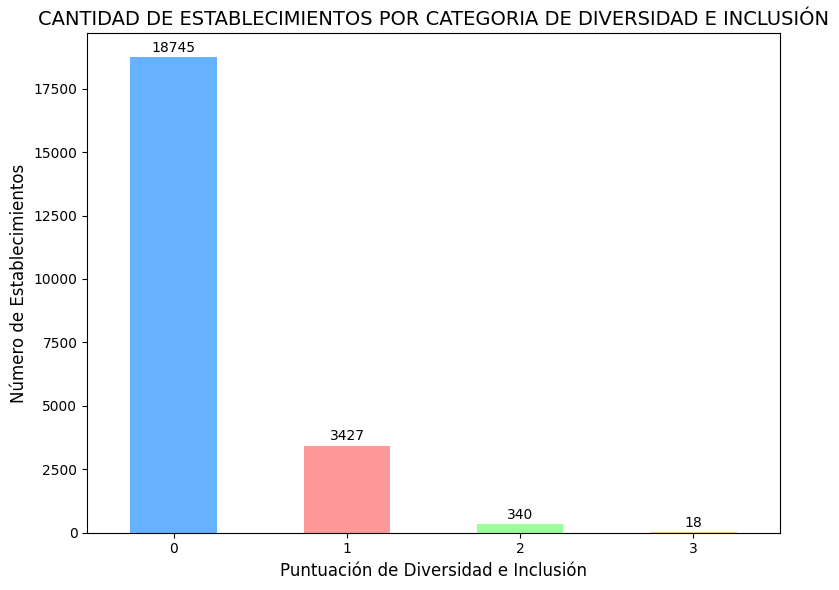

In [191]:
# Calcular la cantidad de establecimientos en cada categoría de DIVERSIDAD_E_INCLUSION
conteo_diversidad = Est_edu_col['DIVERSIDAD_E_INCLUSION'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
conteo_diversidad.plot(kind='bar', color=['#66B2FF', '#FF9999', '#99FF99', '#FFCC99']) # Puedes ajustar los colores

# Añadir etiquetas y título
plt.title('CANTIDAD DE ESTABLECIMIENTOS POR CATEGORIA DE DIVERSIDAD E INCLUSIÓN', fontsize=14)
plt.xlabel('Puntuación de Diversidad e Inclusión', fontsize=12)
plt.ylabel('Número de Establecimientos', fontsize=12)
plt.xticks(rotation=0) # Rotar las etiquetas del eje x si es necesario

# Mostrar los valores en las barras (opcional)
for i, v in enumerate(conteo_diversidad):
    plt.text(i, v + 100, str(v), ha='center', va='bottom') # Ajusta el valor '100' para la posición del texto

# Ajustar el layout para evitar que las etiquetas se corten
plt.tight_layout()

# Mostrar el gráfico
plt.show()

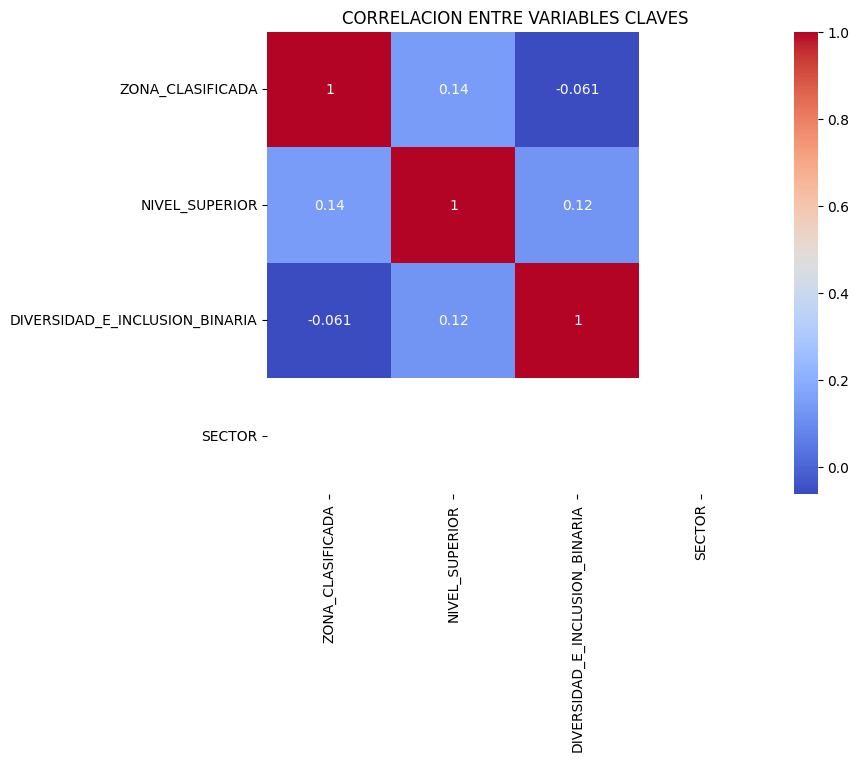

In [192]:

# Convertir variables categóricas a numéricas si es necesario
df_encoded = Est_edu_col.copy()
df_encoded['ZONA_CLASIFICADA'] = df_encoded['ZONA_CLASIFICADA'].map({'RURAL':1, 'URBANA':0})
df_encoded['SECTOR'] = df_encoded['SECTOR'].map({'OFICIAL':1, 'PRIVADO':0})

# Seleccionar variables numéricas
variables = ['ZONA_CLASIFICADA','NIVEL_SUPERIOR','DIVERSIDAD_E_INCLUSION_BINARIA','SECTOR']

corr = df_encoded[variables].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('CORRELACION ENTRE VARIABLES CLAVES')
plt.show()


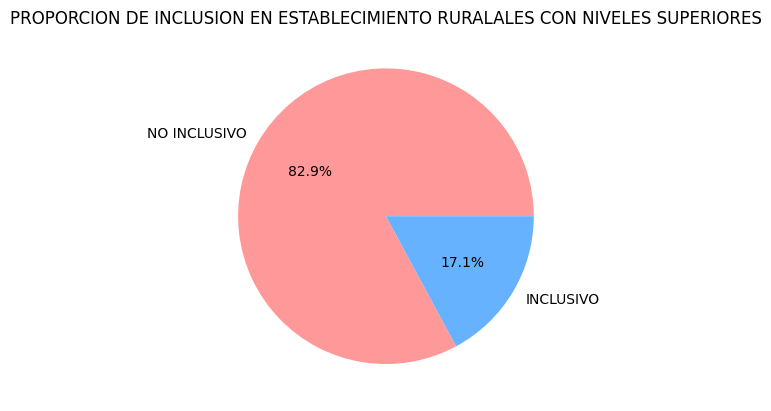

In [193]:
# Proporción de inclusión dentro de los rurales que tienen nivel superior
subset = df_rural[df_rural['NIVEL_SUPERIOR'] == 1]

incluye = subset['DIVERSIDAD_E_INCLUSION_BINARIA'].value_counts(normalize=True)

incluye.plot(kind='pie', autopct='%1.1f%%', labels=['NO INCLUSIVO','INCLUSIVO'], colors=['#FF9999','#66B2FF'])
plt.title('PROPORCION DE INCLUSION EN ESTABLECIMIENTO RURALALES CON NIVELES SUPERIORES')
plt.ylabel('')
plt.show()


<H1> MODELO PREDICTIVO


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1265
           1       0.00      0.00      0.00       209

    accuracy                           0.86      1474
   macro avg       0.43      0.50      0.46      1474
weighted avg       0.74      0.86      0.79      1474



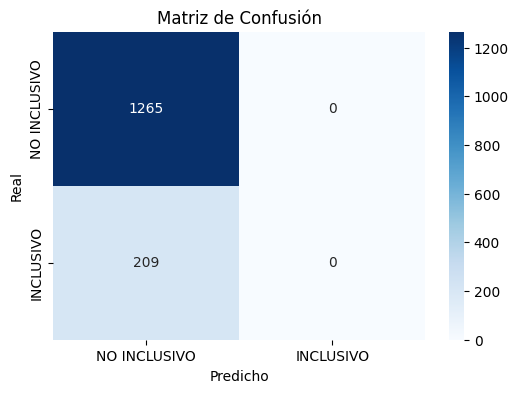

In [194]:


# Filter only the rural establishments (assuming Est_edu_col is your preprocessed DataFrame)
df_rural = Est_edu_col[Est_edu_col['ZONA_CLASIFICADA'] == 'RURAL'].copy()

# Codificar la variable SECTOR
df_rural['SECTOR'] = df_rural['SECTOR'].map({'PUBLICO': 1, 'PRIVADO': 0}) # Corrected mapping based on your previous code

# Seleccionar variables predictoras y etiqueta
features = ['NIVEL_SUPERIOR', 'SECTOR']
target = 'DIVERSIDAD_E_INCLUSION_BINARIA'

X = df_rural[features]
y = df_rural[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # You can adjust test_size and random_state

# Initialize and train a classification model (Logistic Regression is used as an example)
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# %%
# Reporte de clasificación
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['NO INCLUSIVO','INCLUSIVO'], yticklabels=['NO INCLUSIVO','INCLUSIVO'])
plt.title('Matriz de Confusión')
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.show()

COMPROBACION DE HIPOTESIS

In [195]:
import scipy.stats as stats

# Crear tabla de contingencia
tabla = pd.crosstab(df_rural['NIVEL_SUPERIOR'], df_rural['DIVERSIDAD_E_INCLUSION'])

# Test Chi-cuadrado
chi2, p, dof, ex = stats.chi2_contingency(tabla)

print("Estadístico Chi-cuadrado:", chi2)
print("P-valor:", p)


Estadístico Chi-cuadrado: 218.80468095664935
P-valor: 3.6400471394239254e-47


In [196]:
import numpy as np
np.mean(Est_edu_col['NIVEL_SUPERIOR'][Est_edu_col['ZONA_CLASIFICADA']=='RURAL'] == Est_edu_col['DIVERSIDAD_E_INCLUSION_BINARIA'][Est_edu_col['ZONA_CLASIFICADA']=='RURAL'])

np.float64(0.38400977331342473)